# Lecture Scribing: Performance Metrics and Measurement Agreement

## Objectives

+ Metrics to measure measurement performance for categorical and continous data
+ Measurement error models 
+ Visualization of measurement error models using scatter plot and Bland-Altman plot 
+ Metrics for relationships 


## Definitions
(See respective sections for details)
+ Regression
+ Sum of squared errors, mean square error, root mean square error, $R^2$, mean absolute deviation, $\alpha$-trimed MSE
+ Confusion matrix
+ Accuracy, sensitivity, specificity
+ ROC curve
+ Aera under the ROC curve
+ Pearson correlation coefficient, Spearman (rank) correlation coefficient
+ Systematic error, random error
+ Measurement error model
+ Scatter plot, Bland-Altman plot
+ Cohen's Kappa coefficient

## Performance metrics

Metrics can be developed and utilized to measure the performance of measurement methods.

### Continous variables (regression)
The training data include $n$ pairs of values of predictor variable and response variable:  $(x_i,y_i)$, $1<i<n$, where $x_i$ is the value of predictor variable and $y_i$ is the corresponding actual response. Learning the mapping between $x$ and continous $y$ is a regression problem. We use $\hat{y}_i$ to denote predicted/estimated value using a regression method $\hat{y}_i=f(x_i)$. We highlight 6 metrics to evaluate the performance of a regression method. 

1. Sum of squared errors: $\text{SSE}=\sum_{i=1}^n (\hat{y}_i - y_i)^2$. 

2. Mean square error: $\text{MSE}=\frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2$. This metric corresponds to the MLE estimate of a regression method which assumes a normally distributed error. Advantage: easy to use. Disadvantages: (1) not take into account direction; (2) sensitive to outliers.

3. Root mean square error: $\text{RMSE}=\sqrt{\text{MSE}}$.

4. $R^2$: $R^2=1- \frac{\text{MSE}}{\text{var}(\hat{y})}= 1- \frac{\sum_{i=1}^n (\hat{y}_i - y_i)^2}{\sum_{i=1}^n (\hat{y}_i - \bar{y})^2}$.

5. Mean absolute deviation: $\text{MAD}=\frac{1}{n}\sum_{i=1}^n |\hat{y}_i - y_i|$. It assumes a Laplace distributed error, and is an ML estimator. Advantage: robust to outliers. Disadvantage: no direction is considered.

6. $\alpha$-trimed MSE: discard $\alpha\%$ of largest residuals and then compute MSE.


### Categorical variables (classification)

Confusion matrix (see Figure below) provides comprehensive comparison between predicted and actual class labels. 
![Confusion Matrix in Two-Class Problem](confusion_matrix_twoclass.png "Confusion Matrix in Two-Class Problem")

Metric scores are partial descriptions of this matrix using a scalar number. Common metrics include:

1. Sensitivity, recall, true positive rate: $Sen=\frac{TP}{TP+FN}=\frac{TP}{\#P}$, where $\#P$ is the total number of actual positive samples. This is the metric people often care in applications such as clinical diagnosis. 

2. Specificity: $Spec=\frac{TN}{TN+FP}=\frac{TN}{\#N}$, where $\#N$ is the total number of actual negative samples.

3. Positive predictive value (PPV), precision: $PPV=\frac{TP}{TP+FP}$.

4. Negative predictive value (NPV): $NPV=\frac{TN}{TN+FN}$.

5. Accuracy: $Acc=\frac{TP+TN}{N}$, where $N=TP+FN+TN+FP=\#P+\#N$ is the total number of samples. This metric does not fully consider the class imbalance issue.


The two-class confusion matrix can be extended to the multi-class case (see below). The above metrics can be extended accordingly, but is beyond the scope of this course.
![Confusion Matrix in Multi-Class Problem](confusion_matrix_multiclass.png "Confusion Matrix in Multi-Class Problem")

#### Receiver operating characteristic (ROC curve)

Classifiers such as logistic regression outputs posterior $p(y|x)$. A threshold of 0.5 is often applied as default to partition/predict the test samples to positive and negative samples. Sometimes, the default threshold may not be optimal. To overcome the impact of thresholding on classification performance, ROC curve can be ploted by changing the threshold from one extreme to another extreme (in the case of logistric regression, gradually change the posterior over class label from 0 to 1). 

In margin/boundary-based methods (such as support vector machine and linear discriminative analysis), the shift of discriminative border will produce different confusion matrices, from which ROC plot can be drawn.

The closer to the upper left corner, the better the classification performance is. The closer to the diagonal line, the worse the classifier performance.

The following gives an example of drawing ROC, modified from [1]. We assume class 0 ($C_0$, negative class) conditional distribution follows $p(x|C_0)=N(x|0,1)$, and class 1 ($C_1$, positive class) conditional distribution follows $p(x|C_1)=N(x|2,1)$. An arbitrary border to separate these classes is at $c=0.5$ on the x-axis in the left panel. The corresponding point on the ROC curve is highlighted.

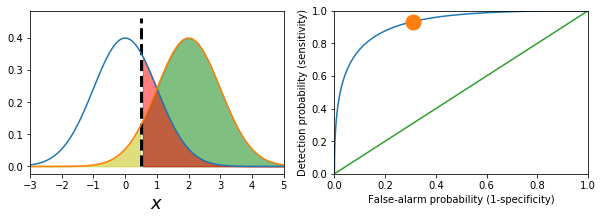

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

f0=stats.norm(0,1) # class conditional for C_0
f1=stats.norm(2,1) # class conditional for C_1
xi = np.linspace(-3,5,100)
fig,axs = plt.subplots(1,2)
fig.set_size_inches((10,3))

# draw class conditional distributions
ax = axs[0]
ax.plot(xi,f0.pdf(xi),label=r'$f(x|C_0)$')
ax.plot(xi,f1.pdf(xi),label=r'$f(x|C_1)$')
ax.set_xlabel(r'$x$',fontsize=18)
c=0.5 # border line
ax.vlines(c,0,ax.axis()[-1]*1.1,linestyles='--',lw=3.)
ax.fill_between(xi,f1.pdf(xi),where=xi>c,alpha=.5,color='g')
ax.fill_between(xi,f1.pdf(xi),where=xi<c,alpha=.5,color='y')
ax.fill_between(xi,f0.pdf(xi),where=xi>c,alpha=.5,color='r')
ax.axis(xmin=-3,xmax=5)

# draw ROC
crange = np.linspace(-3,5,100)
ax=axs[1]
ax.plot(1-f0.cdf(crange),1-f1.cdf(crange))
ax.plot(1-f0.cdf(c),1-f1.cdf(c),'o',ms=15.) # (1-spec) and sen corresponding to c=0.5
ax.plot([0,1],[0,1]) # diagonal line
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('False-alarm probability (1-specificity)')
ax.set_ylabel('Detection probability (sensitivity)')
plt.show()

We can compute the confusion matrix corresponding $x=0.5$, and then compute the corresponding sensitivity and specificity.

In [2]:
# Compute sensitivity and specificity from the drawn data
x0=f0.rvs(size=1000)
x1=f1.rvs(size=1000)
TP=np.sum(x1>0.5)
TN=np.sum(x0<0.5)
sen=TP/1000
spec=TN/1000
print("For c=0.5, sensitivity: {0}, specificity: {1}".format(sen,spec))


For c=0.5, sensitivity: 0.931, specificity: 0.683


The area under the ROC curve (auROC or simply AUC) can be numerically computed. 


In [3]:
FA=1-f0.cdf(crange)
D=1-f1.cdf(crange)
AUC=0
for i in range(len(crange)-1):
    AUC=AUC+ abs(FA[i]-FA[i+1]) * (D[i]+D[i+1])/2
print("The approximate AUC is {0}".format(AUC))

The approximate AUC is 0.9198875739028738


In fact, ROC curve does not reflect issues caused by class imbalance, because sensitivity and specificity are class-wise rate with denomitors being nubmers of actual positive samples and actual negative samples, respectively. The precision-recall curve (PRC) is more suitable in this situation.

## Metrics for relationships
### Pearson Correlation Coefficient
(Modified from [2].)
When measurement $y$ is continuous, the Pearson correlation coefficient (PCC) can be used as a simple score to measure the relationship/correlation of two measure methods. PCC measure the linear correlation between two random variables. Suppose we have paired data $(Y_{i1}, Y_{i2})$, $i=1,\cdots,n$, the PPC can be computed as
\begin{align}
\hat{\rho}=\frac{S_{12}}{\sqrt{S_{1} S_{2}}},
\end{align}
where $S_{12}$ is the sample covariance between $Y_1$ and $Y_2$, $S_1$ is the sample variance of $Y_1$ and $S_2$ is the sample variance of $Y_2$. They are formualted as
\begin{align}
&\bar{Y}_1=\frac{1}{n} \sum_{i=1}^n Y_{i1}\\
&\bar{Y}_2=\frac{1}{n} \sum_{i=1}^n Y_{i2}\\
&S_1=\frac{1}{n-1} \sum_{i=1}^n (Y_{i1}-\bar{Y}_1)^2\\
&S_2=\frac{1}{n-1} \sum_{i=1}^n (Y_{i2}-\bar{Y}_2)^2\\
&S_{12}=\frac{1}{n-1} \sum_{i=1}^n (Y_{i1}-\bar{Y}_1)(Y_{i2}-\bar{Y}_2).
\end{align}
The sample PPC $\hat{\rho}$ is a point estimate of the population PPC which is defined as
\begin{align}
\rho=\frac{\sigma_{12}}{\sigma_{1} \sigma_{2}}.
\end{align}

It has the following properties:
1. When $\rho$ is approaching zero from either -1 or 1, $Y_1$ and $Y_2$ become less linearly correlated;
2. $\rho=1$ means $Y_1$ and $Y_2$ are perfectly positive linearly correlated;
3. $\rho=-1$ means $Y_1$ and $Y_2$ are perfectly negative linearly correlated;
4. $\rho=0$ does not necessarily mean $Y_1$ and $Y_2$ are independent, because they may nonlienarly correlated;
5. If $Y_1$ and $Y_2$ are normal, $\rho=0$ indicates they are independent. 

### Spearman (Rank) Correlation Coefficient
(Modified from [3].)
Unlike PCC, Spearman (Rank) Correlation Coefficient (SCC) is an non-parametric method for sampled continous or ordinal data (measurements). Continuing with the notations in PCC, let $Z_{i1}$ and $Z_{i2}$, $i=1,\cdots n$, be the rank of $Y_{i1}$ and $Y_{i2}$ respectively. Then PPC is applied on $(Z_{i1},Z_{i1})$, $i=1,\cdots n$, to compute SSC. The first four properties of PCC also are also applicable to SCC to help interpretation. 

Finally, we need to emphasize that, if two measurement method agree well, it does not necessary mean they have a good linear correlation coefficient, because the agreement may be nonlinear. If the measurement methods have a good linear correlation coefficient, it does not imply a good agreement due to fixed bais and proportional bias.

## Definition of agreement
Systematic error: Any variable causing a consistent shift in the mean in a given direction. 

Random error: The fluctuation of scores due to chance.

In the classical statistical model, $Y = \beta_0 + \beta_1 b + e$, systematic errors can be modeled by the fixed bias $\beta_0$ and proportional bias $\beta_1$; random errors can be characterized by the variance in actual value $b$ and error term $e$.

From now on, we fix our focus on investigating the agreement two methods in the following measurement error model [4]:
\begin{align}
& Y_1 = b + e_1\\
& Y_2 = \beta_0 + \beta_1 b + e_2,
\end{align}
where method 1 is the reference method, $b$ models the actual value with mean $\mu_b$ and variance $\sigma_b^2$, $e_1$ and $e_2$ are error terms with zeros means and variances $\sigma_{e1}^2$ and $\sigma_{e2}^2$, $\beta_0$ is fixed bias, and $\beta_1$ is proportional bias modeling the scaling of different methods. The paired measurements follow the following a bi-variate distribution with mean 
\begin{align}
\begin{bmatrix}
\mu_1\\
\mu_2
\end{bmatrix}
=
\begin{bmatrix}
\mu_b\\
\beta_0 + \beta_1 \mu_b
\end{bmatrix},
\end{align}
and covariance matrix:
\begin{align}
\begin{bmatrix}
\sigma_1^2 & \sigma_{12}\\
\sigma_{12} & \sigma_2^2
\end{bmatrix}
=
\begin{bmatrix}
\sigma_b^2 + \sigma_{e1}^2 & \beta_1 \sigma_b^2\\
\beta_1 \sigma_b^2     & \beta_1^2\sigma_b^2 + \sigma_{e2}^2
\end{bmatrix}.
\end{align}

In Gubbs model (mixed effect model), $\beta_1=1$, and $b$, $e_1$ and $e_2$ follow normal distributions.

## Bland-Altman and Scatter plot

Scatter plot visualizes paired observations $Y1$ in horizontal axis and $Y_2$ in vertical axis.

Bland-Altman plot show the average, $A=\frac{Y_1+Y_2}{2}$, versus the difference $Y_2-Y_1$ [4].

Both types of plots complement each other for the diagnosis of systematic and random errors.

From the above measurement error model, we have $D=(\beta_1-1)b + e_2 - e_1$. Thus,
$\text{E}[D]=(\beta_1-1) \mu_b$, and $\text{var}(D)=(\beta_1-1)^2 \sigma_b^2 + \sigma_{e2}^2 + \sigma_{e1}^2$. If $\beta_1=1$, then $\text{E}[D]=0$ and $\text{var}(D)=\sigma_{e2}^2 + \sigma_{e1}^2$. 

Below, we first give an implementation in Python for ploting scatter plot and Bland-Alterman plots, and then investigation the interpretation of different scenarios. 

In [4]:

# we first defines a function to plot a scatter plot and a Blant-Altman plot
def plot_scatter_and_blandaltman_plots(Y1, Y2, if_logtransform=False):
    if if_logtransform:
        Y1=np.log(Y1)
        Y2=np.log(Y2)
        
    plt.figure(1)
    plt.subplot(121)
    plt.scatter(Y1,Y2, marker="o")
    axis_min=np.min([np.min(Y1),np.min(Y2)])
    axis_max=np.max([np.max(Y1),np.max(Y2)])
    plt.plot([axis_min,axis_max],[axis_min,axis_max],color="black")
    plt.xlim(axis_min,axis_max)
    plt.ylim(axis_min,axis_max)
    if if_logtransform:
        plt.xlabel("log(Y1)")
        plt.ylabel("log(Y2)")
    else:
        plt.xlabel("Y1")
        plt.ylabel("Y2")  
    plt.title("Scatter Plot")

    plt.subplot(122)
    D=Y2-Y1
    A=0.5*(Y1+Y2)
    plt.plot(A,D, 'bo')
    xaxis_min=np.min([np.min(A)])
    xaxis_max=np.max([np.max(A)])
    yaxis_min=np.min([np.min(D)])
    yaxis_max=np.max([np.max(D)])
    plt.plot([xaxis_min,xaxis_max],[0,0],color="black")
    plt.xlim(xaxis_min,xaxis_max)
    plt.ylim(yaxis_min,yaxis_max)
    if if_logtransform:
        plt.xlabel("(log(Y1)+log(Y2))/2")
        plt.xlabel("log(Y2)-log(Y1)")
    else:
        plt.xlabel("A")
        plt.ylabel("D")
    plt.title("Bland-Altman Plot")
    plt.show()

### (1) Equal mean and equal variance:
Let $\beta_0=0$, $\beta_1=1$, $\mu_b=100$, $\sigma_b=16$, $\sigma_{e2}=4$ and $\sigma_{e1}=4$. Thus,
\begin{align}
\begin{bmatrix}
\mu_1\\
\mu_2
\end{bmatrix}
=
\begin{bmatrix}
\mu_b\\
\beta_0 + \beta_1 \mu_b
\end{bmatrix}
=
\begin{bmatrix}
100\\
100
\end{bmatrix}
\end{align}

and
\begin{align}
\begin{bmatrix}
\sigma_1^2 & \sigma_{12}\\
\sigma_{12} & \sigma_2^2
\end{bmatrix}
=
\begin{bmatrix}
\sigma_b^2 + \sigma_{e1}^2 & \beta_1 \sigma_b^2\\
\beta_1 \sigma_b^2     & \beta_1^2\sigma_b^2 + \sigma_{e2}^2
\end{bmatrix}
=
\begin{bmatrix}
16^2 + 4^2 & 16^2\\
16^2     & 16^2 + 4^2
\end{bmatrix}
\end{align}

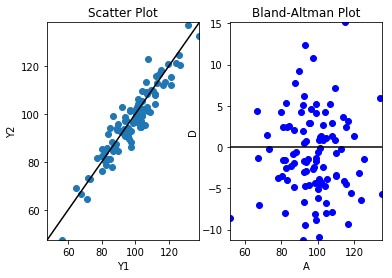

In [5]:
dist = stats.multivariate_normal([100, 100], 
                        [[16*16+4*4, 16*16], [16*16, 16*16+4*4]])
Y=dist.rvs(100)
Y1=Y[:,0]
Y2=Y[:,1]
plot_scatter_and_blandaltman_plots(Y1, Y2, if_logtransform=False)

### (2) Equal mean and unequal variance:
Let $\beta_0=0$, $\beta_1=1$, $\mu_b=100$, $\sigma_b=16$, $\sigma_{e1}=4$ and $\sigma_{e2}=12$. Thus,
\begin{align}
\begin{bmatrix}
\mu_1\\
\mu_2
\end{bmatrix}
=
\begin{bmatrix}
\mu_b\\
\beta_0 + \beta_1 \mu_b
\end{bmatrix}
=
\begin{bmatrix}
100\\
100
\end{bmatrix}
\end{align}

and
\begin{align}
\begin{bmatrix}
\sigma_1^2 & \sigma_{12}\\
\sigma_{12} & \sigma_2^2
\end{bmatrix}
=
\begin{bmatrix}
\sigma_b^2 + \sigma_{e1}^2 & \beta_1 \sigma_b^2\\
\beta_1 \sigma_b^2     & \beta_1^2\sigma_b^2 + \sigma_{e2}^2
\end{bmatrix}
=
\begin{bmatrix}
16^2 + 4^2 & 16^2\\
16^2     & 16^2 + 12^2
\end{bmatrix}
\end{align}


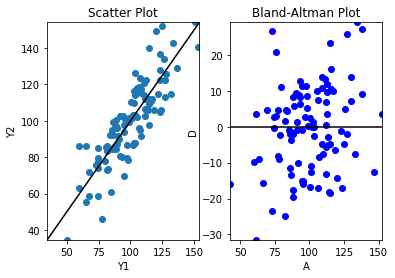

In [6]:
dist = stats.multivariate_normal([100, 100], 
                        [[16*16+4*4, 16*16], [16*16, 16*16+12*12]])
Y=dist.rvs(100)
Y1=Y[:,0]
Y2=Y[:,1]
plot_scatter_and_blandaltman_plots(Y1, Y2, if_logtransform=False)

### (3) Unequal mean and equal variance:
Let $\beta_0=15$, $\beta_1=1$, $\mu_b=100$, $\sigma_b=16$, $\sigma_{e1}=4$ and $\sigma_{e2}=4$. Thus,
\begin{align}
\begin{bmatrix}
\mu_1\\
\mu_2
\end{bmatrix}
=
\begin{bmatrix}
\mu_b\\
\beta_0 + \beta_1 \mu_b
\end{bmatrix}
=
\begin{bmatrix}
100\\
115
\end{bmatrix}
\end{align}

and
\begin{align}
\begin{bmatrix}
\sigma_1^2 & \sigma_{12}\\
\sigma_{12} & \sigma_2^2
\end{bmatrix}
=
\begin{bmatrix}
\sigma_b^2 + \sigma_{e1}^2 & \beta_1 \sigma_b^2\\
\beta_1 \sigma_b^2     & \beta_1^2\sigma_b^2 + \sigma_{e2}^2
\end{bmatrix}
=
\begin{bmatrix}
16^2 + 4^2 & 16^2\\
16^2     & 16^2 + 4^2
\end{bmatrix}
\end{align}

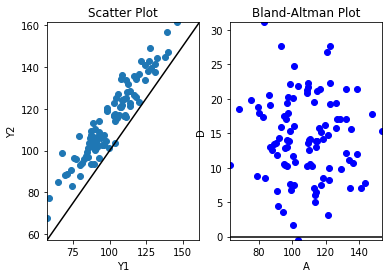

In [7]:
dist = stats.multivariate_normal([100, 115], 
                        [[16*16+4*4, 16*16], [16*16, 16*16+4*4]])
Y=dist.rvs(100)
Y1=Y[:,0]
Y2=Y[:,1]
plot_scatter_and_blandaltman_plots(Y1, Y2, if_logtransform=False)

### (4) Unequal mean and unequal variance:
Let $\beta_0=0$, $\beta_1=1.15$, $\mu_b=100$, $\sigma_b=16$, $\sigma_{e1}=4$ and $\sigma_{e2}=4$. Thus,
\begin{align}
\begin{bmatrix}
\mu_1\\
\mu_2
\end{bmatrix}
=
\begin{bmatrix}
\mu_b\\
\beta_0 + \beta_1 \mu_b
\end{bmatrix}
=
\begin{bmatrix}
100\\
115
\end{bmatrix}
\end{align}

and
\begin{align}
\begin{bmatrix}
\sigma_1^2 & \sigma_{12}\\
\sigma_{12} & \sigma_2^2
\end{bmatrix}
=
\begin{bmatrix}
\sigma_b^2 + \sigma_{e1}^2 & \beta_1 \sigma_b^2\\
\beta_1 \sigma_b^2     & \beta_1^2\sigma_b^2 + \sigma_{e2}^2
\end{bmatrix}
=
\begin{bmatrix}
16^2 + 4^2 & 1.15\times 16^2\\
1.15\times 16^2     & 1.15^2\times 16^2 + 4^2
\end{bmatrix}
\end{align}

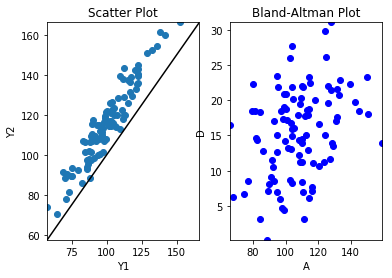

In [8]:
dist = stats.multivariate_normal([100, 115], 
                        [[16*16+4*4, 1.15*16*16], [1.15*16*16, 1.15*1.15*16*16+4*4]])
Y=dist.rvs(100)
Y1=Y[:,0]
Y2=Y[:,1]
plot_scatter_and_blandaltman_plots(Y1, Y2, if_logtransform=False)

### Ideal plot:
When $\beta_0=0$, $\beta_1=1$, and $\sigma_{e1}^2=\sigma_{e2}^2$, the plots are called ideal.

### Linear trend
In a Bland-Altman plot, if there is a linear trend along average horizontal line, we can have two indications: (i) unequal proportional biases, or (ii) unequal precision.

\begin{align}
cov(D,A) = \frac{\sigma_{e1}^2}{2} \big\{ (\beta_1^2 -1 ) \frac{\sigma_b^2}{\sigma_{e1}^2} + \frac{\sigma_{e2}^2}{\sigma_{e1}^2} -1 \big\}
\end{align}


We may not able to tell which is the actual factor from the Bland-Altman plot. But we can use it with the corresponding scatter plot to judge which reason(s). Scenario (2) above is due to reason (i); Scenario (4) is due to (i) and (ii).

Log-transformation can make it better.

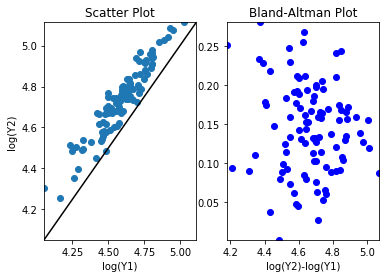

In [9]:
# log-transformation for scenario (4)
plot_scatter_and_blandaltman_plots(Y1, Y2, if_logtransform=True)

### Heteroscedasticity
It refers to change of variance/scatter along the vertical direction as the average A increases. It indicates the variability of D changes with magnitude of measurement.

Reason: dependence of the error variation of one or both methods on the magnitude of measurement.

In most of such case, the Bland-Altman plot shows a fan shape. Log-transformation may alleviate the issue. 

## Cohen’s Kappa coefficient
(Modified from [5]) Cohen's Kappa Coefficient is a non-parametric method to measure agreement of two measurement methods for nominal (non-ordinal) categories. Suppose there are $C$ categories, that is $Y_1, Y_2 \in \{1,2,\cdots, C\}$. From $N$ paired observations, we can fist build the contingency table (similar to confusion matrix for multiple classes) with frequency counts:

![Contigency Table for Cohen's Kappa Coefficient](kappa.png "Contigency Table for Cohen's Kappa Coefficient")

The observed agreement between $Y_1$ and $Y_2$ is computed as 
\begin{align}
p_0 = \frac{1}{n} \sum_{i=1}^C f_{ii}.
\end{align}

The expected agreement by chance is 
\begin{align}
p_e = \frac{1}{n^2} \sum_{i=1}^C f_{i+}f_{+i}.
\end{align}
 
Then the Cohen's Kappa sample coefficient (or statistic) is
\begin{align}
\hat{\kappa} = \frac{p_0 - p_e}{1-p_e}.
\end{align}

It is a point estimate of the population coefficient, which is defined as
\begin{align}
\kappa = \frac{p(Y_1 = Y_2) - p(Y_1 = Y_2 | Y_1, Y_2 \text{ independent})}{1-p(Y_1 = Y_2 | Y_1, Y_2 \text{ independent})}.
\end{align}

Properties:
1. Generally, $0\le \kappa\le 1$, where $\kappa=1$ indicates perfect agreement.



## References
[1] https://github.com/unpingco/Python-for-Signal-Processing/blob/master/AUC_Derivation.ipynb

[2] https://onlinecourses.science.psu.edu/stat509/node/156

[3] https://onlinecourses.science.psu.edu/stat509/node/157

[4] P. K. Choudhary and H. N. Nagaraja, Measuring Agreement: Models, Methods, and Applications, 1st ed. New York: John Wiley & Sons, Inc.,2017.

[5] https://onlinecourses.science.psu.edu/stat509/node/162